# Generator  without discriminator
This is an experimentation so have a baseline generator without having the GAN framework.
We should aim to have a big improvement over this baseline

In [4]:
from matplotlib import pyplot as plt
import requests
import io
import numpy as np
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import Ridge

In [19]:



def get_mnist_data(specific_digit=None):
    response = requests.get('https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')
    response.raise_for_status()
    data = np.load(io.BytesIO(response.content))

    x_train = data['x_train'] / 255
    x_test = data['x_test'] / 255
    y_train = data['y_train']
    y_test = data['y_test']

    # If a specific digit is provided, filter the data to only include samples of that digit
    if specific_digit is not None:
        if not (0 <= specific_digit <= 9):
            raise ValueError("specific_digit must be between 0 and 9.")

        # Filter the training and test data
        train_mask = (y_train == specific_digit)
        test_mask = (y_test == specific_digit)

        x_train = x_train[train_mask]
        y_train = y_train[train_mask]
        x_test = x_test[test_mask]
        y_test = y_test[test_mask]

    return x_train, x_test, y_train, y_test

def generator_model_example():
    x_train, x_test, y_train, y_test = get_mnist_data(0)

    # Labels are flatten images
    labels = np.vstack((x_train, x_test))
    labels = np.reshape(labels, (labels.shape[0], -1))

    # Input is random
    inputs = np.random.uniform(0,1, labels.shape)

    regr = MultiOutputRegressor(Ridge(random_state=123)).fit(inputs, labels)

        
    return regr

def generate_images(model, nb_of_images=10):
    random_seeds = np.random.uniform(0, 1, (nb_of_images, 784))
    gen_images = model.predict(random_seeds)
    
    width = 4
    length = int(nb_of_images / width) + 1

    i = 0
    print("GENERATED IMAGES:")
    for img in gen_images:
        re_formatted = np.reshape(img, (28, 28)) * 255
        
        ax = plt.subplot(length, width, i + 1)
        plt.imshow(re_formatted, cmap="gray")
        plt.xticks([])
        plt.yticks([])
        
        i+=1

In [ ]:
generator = generator_model_example()

GENERATED IMAGES:


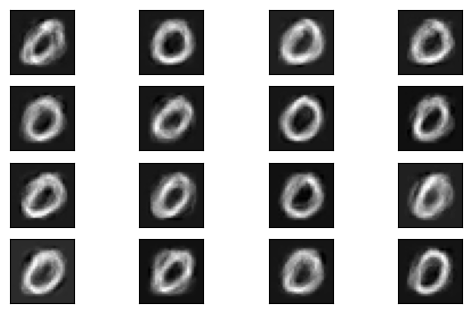

In [21]:
generate_images(generator, 16)


In [3]:
import numpy as np 

predicted_proba = np.array([0.01973679, 0.01972672, 0.01972982, 0.01959094, 0.01960826, 0.0196126,
 0.01975577, 0.01956968, 0.01950759,0.0195937,  0.01975325, 0.0195718])


print(f"nb: {predicted_proba.shape[0]}")
print(f"Final Acc on gen only: {predicted_proba[(predicted_proba < 0.5)].shape[0]}")
print(f"Final misscla on gen only: {predicted_proba[(predicted_proba > 0.5)].shape[0]}")

nb: 12
Final Acc on gen only: 12
Final misscla on gen only: 0
